In [1]:
import pandas as pd 
from pandas import Series
import matplotlib.pyplot as plt 
import sklearn
import seaborn as sns
import numpy as np 
from sklearn.preprocessing import scale,StandardScaler
from sklearn.model_selection import train_test_split,GridSearchCV
from sklearn.metrics import confusion_matrix,accuracy_score,mean_squared_error,r2_score,classification_report
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
from sklearn.neural_network import MLPClassifier
from sklearn.tree import DecisionTreeClassifier,plot_tree
from sklearn.ensemble import  RandomForestClassifier 
from sklearn.ensemble import GradientBoostingClassifier
from sklearn import tree
import graphviz
from time import time

In [2]:
df=pd.read_excel("university_rankings.xlsx")

In [3]:
df.loc[1261]

Rank                                               14
Name/ Country          Dokuz Eylül University\nTurkey
No. Of FTE Students                             56233
Students per staff                               17.6
int. Students                                    0.03
Female                                           47.0
Male                                             53.0
Overall                                     18.4–24.3
Teaching                                         18.4
Research                                         13.3
Citations                                        20.9
industry income                                  95.8
int.outlook                                      21.7
Name: 1261, dtype: object

In [11]:
df

,Rank,Name/ Country,No. Of FTE Students,Students per staff,int. Students,Female,Male,Overall,Teaching,Research,Citations,industry income,int.outlook
0,1,University of Oxford\nUnited Kingdom,20965,10.6,0.42,48.0,52.0,96.4,92.3,99.7,99.0,74.9,96.2
1,1,Harvard University\nUnited States,21887,9.6,0.25,50.0,50.0,95.2,94.8,99.0,99.3,49.5,80.5
2,1,University of Cambridge\nUnited Kingdom,20185,11.3,0.39,47.0,53.0,94.8,90.9,99.5,97.0,54.2,95.8
3,1,Stanford University\nUnited States,16164,7.1,0.24,46.0,54.0,94.8,94.2,96.7,99.8,65.0,79.8
4,1,Massachusetts Institute of Technology\nUnited ...,11415,8.2,0.33,40.0,60.0,94.2,90.7,93.6,99.8,90.9,89.3
...,...,...,...,...,...,...,...,...,...,...,...,...,...
1794,15,Yamaguchi University\nJapan,10724,11.1,0.07,38.0,62.0,10.4–18.3,21.3,12.3,13.9,43.8,30.4
1795,15,Yanshan University\nChina,38649,13.2,0.01,39.0,61.0,10.4–18.3,17.2,10.9,18.3,46.9,17.0
1796,15,Yeditepe University\nTurkey,17038,28.2,0.05,55.0,45.0,10.4–18.3,18.8,12.2,10.5,65.7,29.6
1797,15,Yuri Gagarin State Technical University of Sar...,28280,34.1,0.01,42.0,58.0,10.4–18.3,12.5,8.9,7.2,37.5,16.7


In [4]:
df.isna().sum()

Rank                    0
Name/ Country           0
No. Of FTE Students     0
Students per staff      0
int. Students           0
Female                 85
Male                   85
Overall                 0
Teaching                0
Research                0
Citations               0
industry income         0
int.outlook             0
dtype: int64

In [48]:
df.describe()

,No. Of FTE Students,Students per staff,Female,Male,Teaching,Research,Citations,industry income,int.outlook
count,1799.000000,1799.000000,1714.000000,1714.000000,1799.000000,1799.000000,1799.000000,1799.000000,1799.000000
mean,22505.192885,18.508338,50.914236,49.085764,27.018010,23.016898,48.495887,47.104558,46.880378
std,26808.634140,11.125834,12.409259,12.409259,13.282243,16.763819,27.967185,15.093682,22.582401
min,489.000000,0.900000,2.000000,0.000000,11.600000,7.400000,0.800000,36.900000,14.100000
25%,9515.500000,12.400000,44.000000,42.000000,18.000000,11.300000,23.100000,37.800000,27.900000
50%,17001.000000,16.200000,53.000000,47.000000,22.700000,17.000000,47.200000,40.500000,42.100000
75%,28578.000000,21.650000,58.000000,56.000000,31.850000,28.900000,72.350000,48.300000,62.100000
max,460632.000000,232.200000,100.000000,98.000000,94.800000,99.700000,100.000000,100.000000,99.700000


In [3]:
df=df.set_index("Name/ Country")

In [152]:
df

,Rank,No. Of FTE Students,Students per staff,int. Students,Female,Male,Overall,Teaching,Research,Citations,industry income,int.outlook
Name/ Country,,,,,,,,,,,,
University of Oxford\nUnited Kingdom,1,20965,10.6,0.42,48.0,52.0,96.4,92.3,99.7,99.0,74.9,96.2
Harvard University\nUnited States,1,21887,9.6,0.25,50.0,50.0,95.2,94.8,99.0,99.3,49.5,80.5
University of Cambridge\nUnited Kingdom,1,20185,11.3,0.39,47.0,53.0,94.8,90.9,99.5,97.0,54.2,95.8
Stanford University\nUnited States,1,16164,7.1,0.24,46.0,54.0,94.8,94.2,96.7,99.8,65.0,79.8
Massachusetts Institute of Technology\nUnited States,1,11415,8.2,0.33,40.0,60.0,94.2,90.7,93.6,99.8,90.9,89.3
...,...,...,...,...,...,...,...,...,...,...,...,...
Yamaguchi University\nJapan,15,10724,11.1,0.07,38.0,62.0,10.4–18.3,21.3,12.3,13.9,43.8,30.4
Yanshan University\nChina,15,38649,13.2,0.01,39.0,61.0,10.4–18.3,17.2,10.9,18.3,46.9,17.0
Yeditepe University\nTurkey,15,17038,28.2,0.05,55.0,45.0,10.4–18.3,18.8,12.2,10.5,65.7,29.6


In [ ]:
# Veri Ön İşleme

In [4]:
df["Female"]=df["Female"].fillna(df["Female"].mean())

In [10]:
df.isna().sum()

Rank                    0
Name/ Country           0
No. Of FTE Students     0
Students per staff      0
int. Students           0
Female                  0
Male                   85
Overall                 0
Teaching                0
Research                0
Citations               0
industry income         0
int.outlook             0
dtype: int64

In [13]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1799 entries, 0 to 1798
Data columns (total 13 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   Rank                 1799 non-null   int64  
 1   Name/ Country        1799 non-null   object 
 2   No. Of FTE Students  1799 non-null   int64  
 3   Students per staff   1799 non-null   float64
 4   int. Students        1799 non-null   float64
 5   Female               1714 non-null   float64
 6   Male                 1714 non-null   float64
 7   Overall              1799 non-null   object 
 8   Teaching             1799 non-null   float64
 9   Research             1799 non-null   float64
 10  Citations            1799 non-null   float64
 11  industry income      1799 non-null   float64
 12  int.outlook          1799 non-null   float64
dtypes: float64(9), int64(2), object(2)
memory usage: 182.8+ KB


# Görselleştirme BoxPlot

C:\Users\arsla\AppData\Local\Programs\Python\Python311\Lib\site-packages\seaborn\categorical.py:3544: UserWarning: 89.3% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.
  warnings.warn(msg, UserWarning)
C:\Users\arsla\AppData\Local\Programs\Python\Python311\Lib\site-packages\seaborn\categorical.py:3544: UserWarning: 89.9% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.
  warnings.warn(msg, UserWarning)
C:\Users\arsla\AppData\Local\Programs\Python\Python311\Lib\site-packages\seaborn\categorical.py:3544: UserWarning: 85.4% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.
  warnings.warn(msg, UserWarning)
C:\Users\arsla\AppData\Local\Programs\Python\Python311\Lib\site-packages\seaborn\categorical.py:3544: UserWarning: 80.0% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.
  warnings.warn(ms

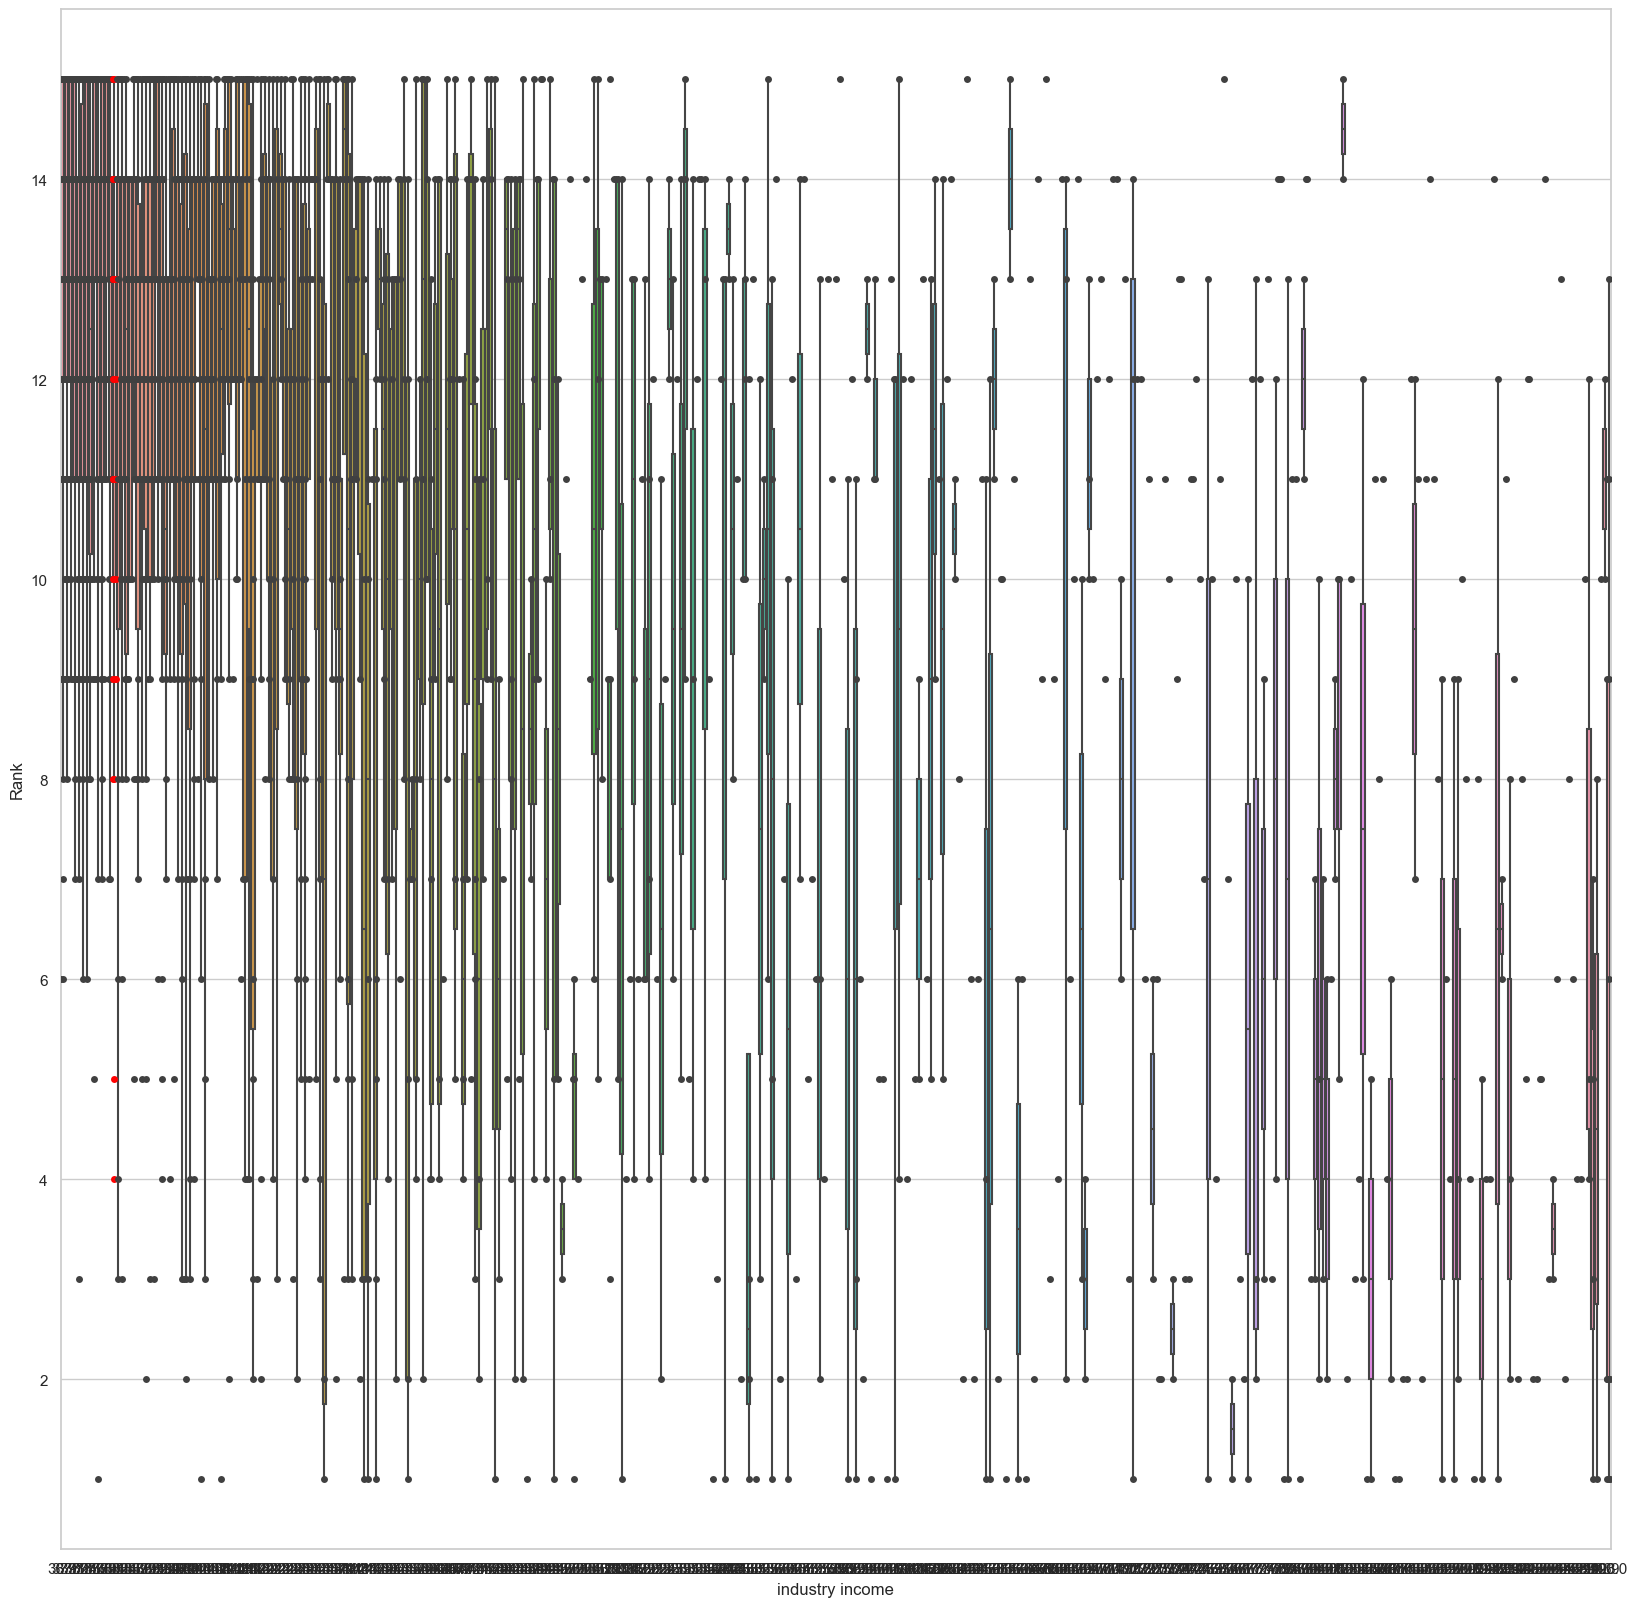

In [15]:
plt.figure(figsize=(20,20))
sns.set(style="whitegrid")
ax=sns.boxplot(x="industry income",y="Rank",data=df,showfliers=False)
ax_1=sns.swarmplot(x="industry income",y="Rank",data=df,color=".25")
swam_points=ax.collections[13].set_color("red")
plt.show()

In [25]:
# Traning - Test

In [5]:
y=df["Rank"]
X=df.drop(["Rank","Overall","Male"],axis=1)

In [6]:
x_train,x_test,y_train,y_test=train_test_split(X,y,test_size=0.20,random_state=42,stratify=y)

In [212]:
y_train

Name/ Country
Saitama University Japan                                15
Technical University of Cluj-Napoca\nRomania            15
Kyoto Institute of Technology\nJapan                    15
Huazhong University of Science and Technology\nChina     4
Nippon Medical School\nJapan                            12
                                                        ..
University of Oviedo\nSpain                             13
Government College University Lahore\nPakistan          14
Hiroshima University\nJapan                             12
Tokai University\nJapan                                 14
Northwest University\nChina                             13
Name: Rank, Length: 1439, dtype: int64

# Sınıflandırma Adımları

# Naive Bayes Sınıflandırma

In [14]:
from sklearn.naive_bayes import GaussianNB
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score,confusion_matrix,mean_squared_error

In [15]:
nb=GaussianNB().fit(x_train,y_train)

In [16]:
y_pred=nb.predict(x_test)

In [19]:
accuracy_score(y_test,y_pred)

0.5833333333333334

In [18]:
classification_report(y_test,y_pred)

'              precision    recall  f1-score   support\n\n           1       1.00      0.70      0.82        10\n           2       0.62      0.80      0.70        10\n           3       0.43      0.60      0.50        10\n           4       0.18      0.20      0.19        10\n           5       0.57      0.40      0.47        10\n           6       0.25      0.20      0.22        10\n           7       0.00      0.00      0.00        10\n           8       0.00      0.00      0.00        10\n           9       0.27      0.48      0.34        21\n          10       0.17      0.16      0.16        19\n          11       0.45      0.60      0.52        40\n          12       0.56      0.25      0.34        40\n          13       0.55      0.68      0.61        41\n          14       0.85      0.85      0.85        61\n          15       0.96      0.93      0.95        58\n\n    accuracy                           0.58       360\n   macro avg       0.46      0.46      0.45       360\nweigh

# Decission Tree

In [7]:
from sklearn.tree import DecisionTreeClassifier

In [8]:
cart_model=DecisionTreeClassifier().fit(x_train,y_train)

In [9]:
y_pred_2=cart_model.predict(x_test)

In [10]:
accuracy_score(y_test,y_pred_2)

0.6333333333333333

In [25]:
dugum=cart_model.tree_.node_count
# Bu kod satırında karar ağacında kaç adet düğüm olduğu öğrenilmiştir.
num_yaprak = cart_model.get_n_leaves()

In [21]:
dugum

629

In [29]:
num_yaprak

315

In [11]:
classification_report(y_test,y_pred_2)

'              precision    recall  f1-score   support\n\n           1       0.89      0.80      0.84        10\n           2       0.67      0.60      0.63        10\n           3       0.62      1.00      0.77        10\n           4       0.50      0.20      0.29        10\n           5       0.43      0.30      0.35        10\n           6       0.38      0.60      0.46        10\n           7       0.50      0.60      0.55        10\n           8       0.38      0.30      0.33        10\n           9       0.36      0.38      0.37        21\n          10       0.23      0.26      0.24        19\n          11       0.74      0.57      0.65        40\n          12       0.68      0.68      0.68        40\n          13       0.70      0.78      0.74        41\n          14       0.71      0.69      0.70        61\n          15       0.80      0.81      0.80        58\n\n    accuracy                           0.63       360\n   macro avg       0.57      0.57      0.56       360\nweigh

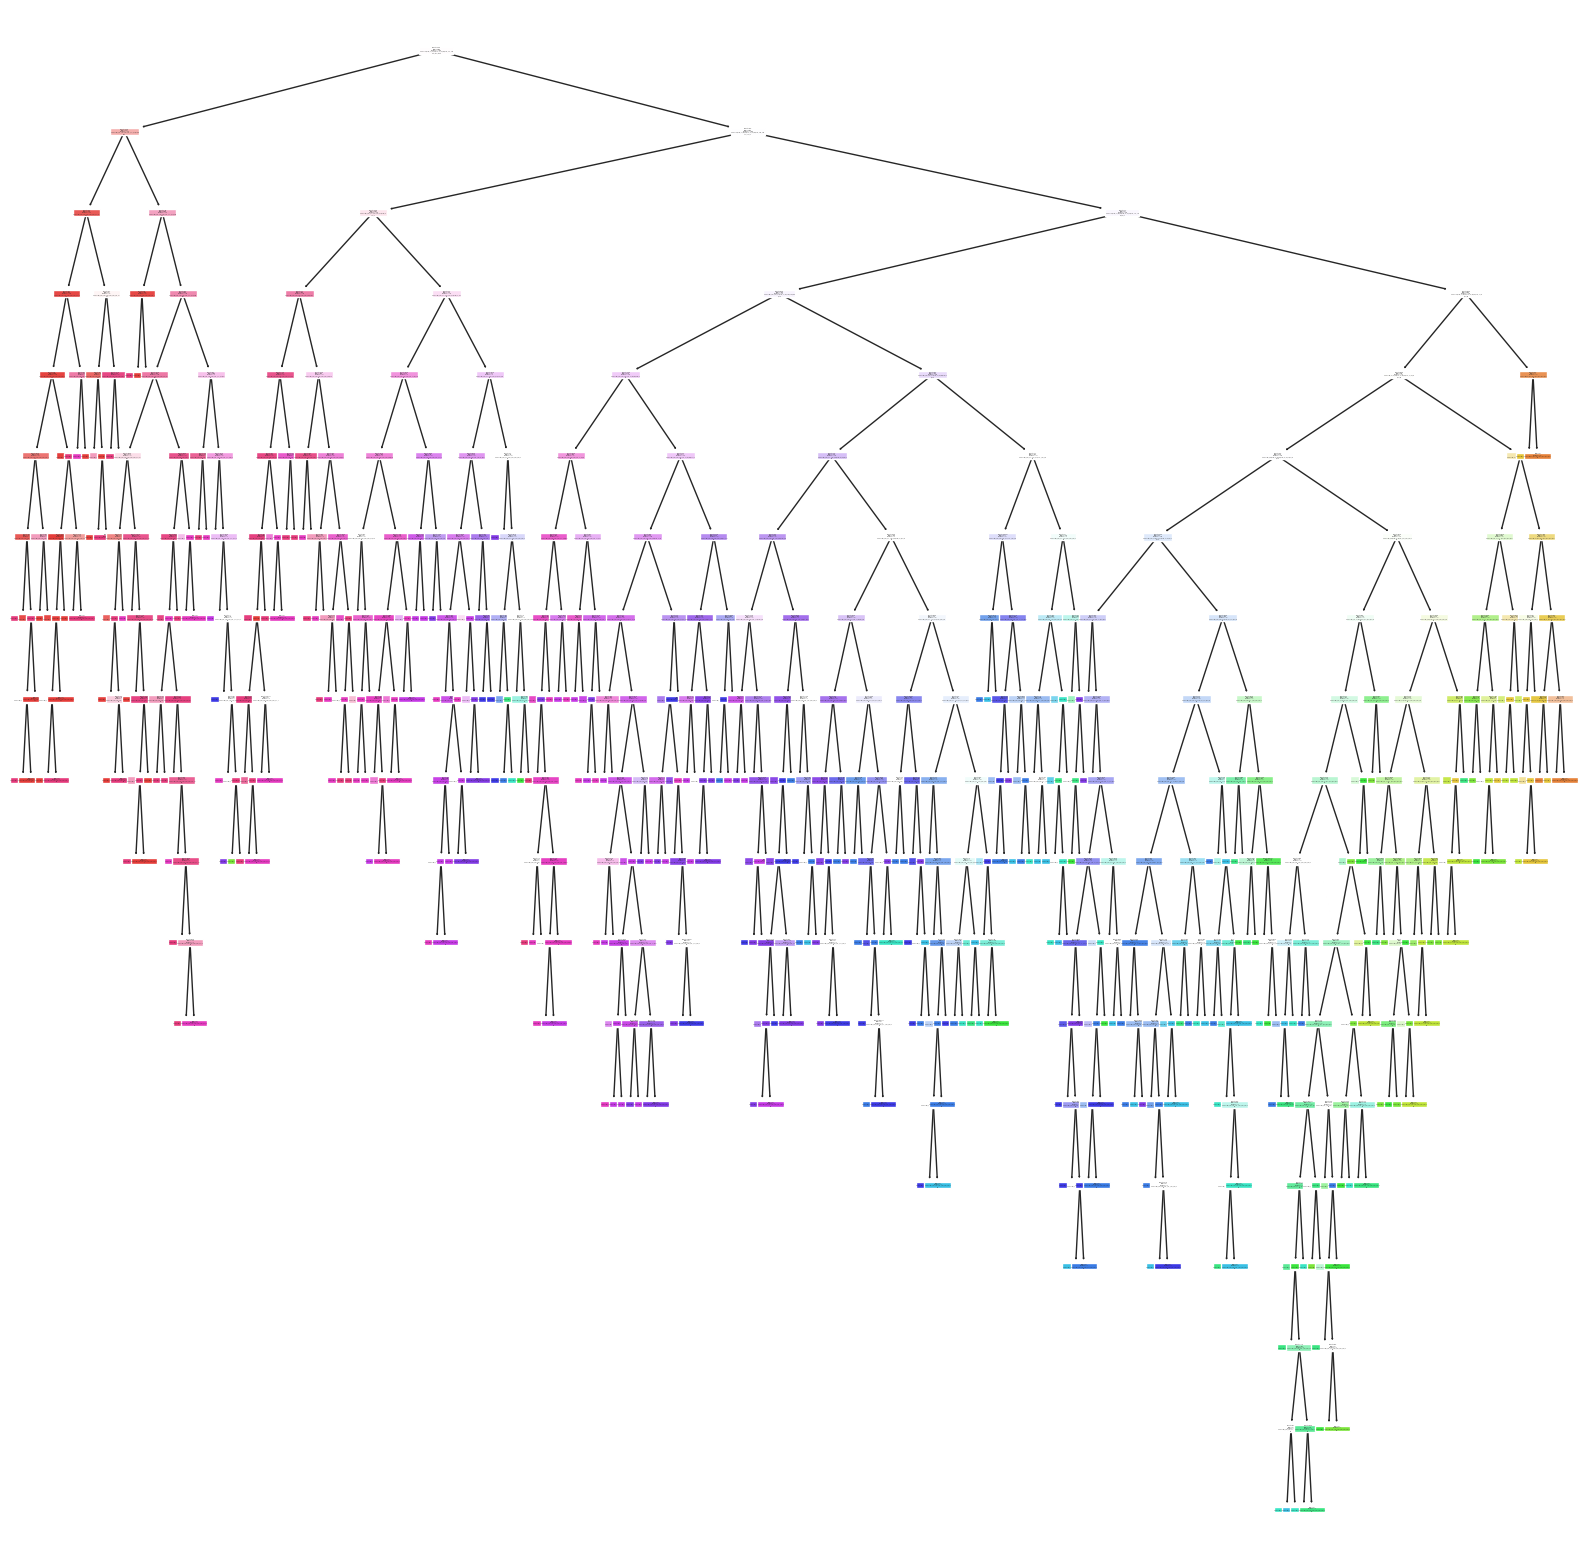

In [351]:
plt.figure(figsize=(20,20))
plot_tree(cart_model, filled=True)
plt.savefig("Grafik.jpg",dpi=1200)
plt.show()

# Randon Forest 

In [30]:
RF_model = RandomForestClassifier().fit(x_train,y_train)

In [31]:
y_pred_3=RF_model.predict(x_test)

In [32]:
accuracy_score(y_pred_3,y_test)

0.7

In [33]:
# Forest Tuning 

In [34]:
Rf=RandomForestClassifier()

In [35]:
Rf_params={"n_estimators":[100,200,300,500,1000],
          "max_features":[1,3,5,9],
          "min_samples_split":[2,5,10,20]}

In [37]:
Rf_cv=GridSearchCV(Rf,Rf_params,cv=10,n_jobs=-1,verbose=2).fit(x_train,y_train)

Fitting 10 folds for each of 80 candidates, totalling 800 fits


KeyboardInterrupt: 

In [36]:
Rf_cv.best_params_

NameError: name 'Rf_cv' is not defined

In [ ]:
# Final Modeli

In [41]:
y_pred_tune_2=RF_tune.predict(x_test)

In [42]:
t0= time()
RF_tune=RandomForestClassifier(max_features=5,
                              min_samples_split=2,
                              n_estimators=1000).fit(x_train,y_train)
RF_time = time() - t0
RF_acc = accuracy_score(y_test,y_pred_tune_2)

In [43]:
classification_report(y_test,y_pred_tune_2)

'              precision    recall  f1-score   support\n\n           1       1.00      0.80      0.89        10\n           2       0.75      0.90      0.82        10\n           3       0.64      0.90      0.75        10\n           4       1.00      0.20      0.33        10\n           5       0.47      0.70      0.56        10\n           6       0.50      0.40      0.44        10\n           7       0.50      0.50      0.50        10\n           8       0.67      0.40      0.50        10\n           9       0.54      0.62      0.58        21\n          10       0.50      0.53      0.51        19\n          11       0.74      0.65      0.69        40\n          12       0.74      0.72      0.73        40\n          13       0.77      0.90      0.83        41\n          14       0.83      0.82      0.83        61\n          15       0.86      0.88      0.87        58\n\n    accuracy                           0.73       360\n   macro avg       0.70      0.66      0.66       360\nweigh

In [43]:
# DEğişken önem derecesi Grafiği

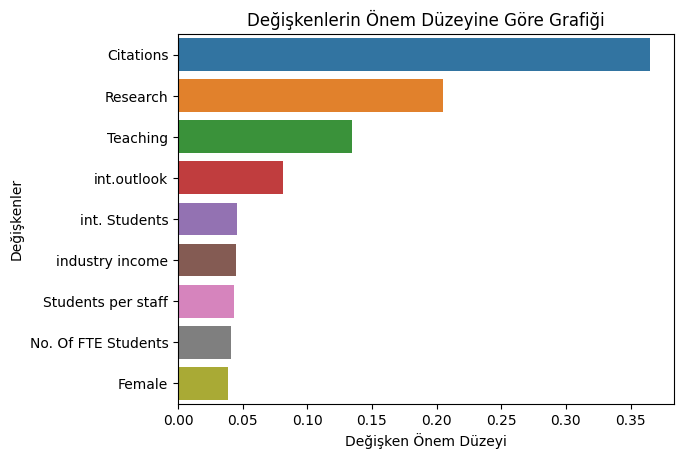

In [26]:
feature_imp=pd.Series(RF_tune.feature_importances_,
                     index=x_train.columns).sort_values(ascending=False)
sns.barplot(x=feature_imp,y=feature_imp.index)
plt.xlabel("Değişken Önem Düzeyi")
plt.ylabel("Değişkenler")
plt.title("Değişkenlerin Önem Düzeyine Göre Grafiği")
plt.show()

In [355]:
confusion_matrix(y_test,y_pred_tune_2)

array([[ 8,  2,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0],
       [ 0,  9,  1,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0],
       [ 0,  1,  9,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0],
       [ 0,  0,  3,  2,  4,  1,  0,  0,  0,  0,  0,  0,  0,  0,  0],
       [ 0,  0,  0,  0,  7,  2,  0,  0,  1,  0,  0,  0,  0,  0,  0],
       [ 0,  0,  0,  0,  4,  4,  2,  0,  0,  0,  0,  0,  0,  0,  0],
       [ 0,  0,  0,  0,  0,  2,  5,  2,  1,  0,  0,  0,  0,  0,  0],
       [ 0,  0,  0,  0,  0,  0,  3,  4,  3,  0,  0,  0,  0,  0,  0],
       [ 0,  0,  0,  0,  0,  0,  0,  1, 13,  7,  0,  0,  0,  0,  0],
       [ 0,  0,  0,  0,  0,  0,  0,  0,  3, 10,  6,  0,  0,  0,  0],
       [ 0,  0,  0,  0,  0,  0,  0,  0,  1,  3, 25, 10,  1,  0,  0],
       [ 0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  4, 29,  7,  0,  0],
       [ 0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  1, 37,  3,  0],
       [ 0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  3, 51,  7],
       [ 0,  0,  0,  0,  0,  0,  0

In [363]:
classification_report(y_test,y_pred_tune_2)

'              precision    recall  f1-score   support\n\n           1       1.00      0.80      0.89        10\n           2       0.75      0.90      0.82        10\n           3       0.69      0.90      0.78        10\n           4       1.00      0.20      0.33        10\n           5       0.47      0.70      0.56        10\n           6       0.44      0.40      0.42        10\n           7       0.50      0.50      0.50        10\n           8       0.57      0.40      0.47        10\n           9       0.59      0.62      0.60        21\n          10       0.50      0.53      0.51        19\n          11       0.71      0.62      0.67        40\n          12       0.72      0.72      0.73        40\n          13       0.77      0.90      0.83        41\n          14       0.84      0.84      0.84        61\n          15       0.88      0.88      0.88        58\n\n    accuracy                           0.73       360\n   macro avg       0.70      0.66      0.66       360\nweigh

# KNN 

In [27]:
knn_model=KNeighborsClassifier().fit(x_train,y_train)

In [28]:
y_pred_4=knn_model.predict(x_test)

In [29]:
accuracy_score(y_pred_4,y_test)

0.125

In [245]:
# KNN Tuning 

In [30]:
knn=KNeighborsClassifier()

In [31]:
knn_params={"n_neighbors":np.arange(1,50)}

In [32]:
knn_cv=GridSearchCV(knn,knn_params,cv=5).fit(x_train,y_train)

In [33]:
from sklearn.model_selection import GridSearchCV

In [34]:
knn_cv.best_params_

{'n_neighbors': 1}

In [ ]:
# KNN Final Modeli

In [46]:
y_pred_tune=knn_tune.predict(x_test)

In [47]:
t0= time()
knn_tune=KNeighborsClassifier(n_neighbors=1).fit(x_train,y_train)
knn_time = time() - t0
knn_acc = accuracy_score(y_test,y_pred_tune)

In [48]:
classification_report(y_test,y_pred_tune)

'              precision    recall  f1-score   support\n\n           1       0.00      0.00      0.00        10\n           2       0.14      0.10      0.12        10\n           3       0.20      0.10      0.13        10\n           4       0.09      0.10      0.10        10\n           5       0.00      0.00      0.00        10\n           6       0.00      0.00      0.00        10\n           7       0.00      0.00      0.00        10\n           8       0.00      0.00      0.00        10\n           9       0.12      0.14      0.13        21\n          10       0.04      0.05      0.05        19\n          11       0.19      0.20      0.20        40\n          12       0.11      0.15      0.12        40\n          13       0.21      0.22      0.21        41\n          14       0.29      0.26      0.27        61\n          15       0.32      0.34      0.33        58\n\n    accuracy                           0.18       360\n   macro avg       0.11      0.11      0.11       360\nweigh

# Lojistik Regresyon 

In [50]:
Y_lr_pred=lr_model.predict(x_test)

In [51]:
t0= time()
lr_model=LogisticRegression(solver="liblinear").fit(x_train,y_train)

lr_time = time() - t0
lr_acc = accuracy_score(y_test,Y_lr_pred)

In [348]:
lr_model.intercept_

array([-1.40222518e-01, -2.16832401e-02, -3.73181480e-02, -4.73654117e-02,
       -5.97919311e-02, -1.64046431e-02, -7.42925608e-03, -1.09855644e-02,
       -8.42329321e-03, -7.71613601e-03, -1.68414462e-03, -4.44823751e-03,
       -5.59286274e-06,  2.38144964e-03,  3.75309988e-02])

In [52]:
classification_report(y_test,Y_lr_pred)

C:\Users\arsla\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\metrics\_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\arsla\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\metrics\_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\arsla\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\metrics\_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average,

'              precision    recall  f1-score   support\n\n           1       0.75      0.90      0.82        10\n           2       0.21      0.30      0.25        10\n           3       0.57      0.40      0.47        10\n           4       0.00      0.00      0.00        10\n           5       0.80      0.40      0.53        10\n           6       0.50      0.10      0.17        10\n           7       0.00      0.00      0.00        10\n           8       0.00      0.00      0.00        10\n           9       0.00      0.00      0.00        21\n          10       0.50      0.05      0.10        19\n          11       0.19      0.50      0.28        40\n          12       0.18      0.20      0.19        40\n          13       0.18      0.07      0.10        41\n          14       0.47      0.70      0.56        61\n          15       0.76      0.78      0.77        58\n\n    accuracy                           0.39       360\n   macro avg       0.34      0.29      0.28       360\nweigh

In [53]:
accuracy_score(y_test,Y_lr_pred)

0.39166666666666666

# Yapay Sinir Ağları

In [54]:
Mlpc_model=MLPClassifier().fit(x_train,y_train)

In [55]:
y_pred_Mlpc=Mlpc_model.predict(x_test)

In [56]:
accuracy_score(y_pred_Mlpc,y_test)

0.05555555555555555

In [ ]:
# Yapay Sinir Ağları Tuning

In [50]:
MLPC= MLPClassifier(solver="lbfgs")
MLPC_params={"alpha":[1,2,3,5,0.1,0.01,0.03,0.05],
            "hidden_layer_sizes":[(10,10),(100,100),(3,5)]}

In [47]:
mlpc_cv=GridSearchCV(MLPC,MLPC_params,cv=5,verbose=2).fit(x_train,y_train)

Fitting 5 folds for each of 24 candidates, totalling 120 fits
[CV] END ...............alpha=1, hidden_layer_sizes=(10, 10); total time=   0.1s


C:\Users\arsla\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:541: ConvergenceWarning: lbfgs failed to converge (status=2):
ABNORMAL_TERMINATION_IN_LNSRCH.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _check_optimize_result("lbfgs", opt_res, self.max_iter)
C:\Users\arsla\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:541: ConvergenceWarning: lbfgs failed to converge (status=2):
ABNORMAL_TERMINATION_IN_LNSRCH.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _check_optimize_result("lbfgs", opt_res, self.max_iter)
C:\Users\arsla\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:541: ConvergenceWarn

[CV] END ...............alpha=1, hidden_layer_sizes=(10, 10); total time=   0.0s
[CV] END ...............alpha=1, hidden_layer_sizes=(10, 10); total time=   0.0s
[CV] END ...............alpha=1, hidden_layer_sizes=(10, 10); total time=   0.0s


C:\Users\arsla\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:541: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _check_optimize_result("lbfgs", opt_res, self.max_iter)


[CV] END ...............alpha=1, hidden_layer_sizes=(10, 10); total time=   0.4s


C:\Users\arsla\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:541: ConvergenceWarning: lbfgs failed to converge (status=2):
ABNORMAL_TERMINATION_IN_LNSRCH.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _check_optimize_result("lbfgs", opt_res, self.max_iter)
C:\Users\arsla\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:541: ConvergenceWarning: lbfgs failed to converge (status=2):
ABNORMAL_TERMINATION_IN_LNSRCH.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _check_optimize_result("lbfgs", opt_res, self.max_iter)


[CV] END .............alpha=1, hidden_layer_sizes=(100, 100); total time=   0.4s
[CV] END .............alpha=1, hidden_layer_sizes=(100, 100); total time=   0.1s


C:\Users\arsla\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:541: ConvergenceWarning: lbfgs failed to converge (status=2):
ABNORMAL_TERMINATION_IN_LNSRCH.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _check_optimize_result("lbfgs", opt_res, self.max_iter)


[CV] END .............alpha=1, hidden_layer_sizes=(100, 100); total time=   0.1s


C:\Users\arsla\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:541: ConvergenceWarning: lbfgs failed to converge (status=2):
ABNORMAL_TERMINATION_IN_LNSRCH.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _check_optimize_result("lbfgs", opt_res, self.max_iter)


[CV] END .............alpha=1, hidden_layer_sizes=(100, 100); total time=   0.2s


C:\Users\arsla\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:541: ConvergenceWarning: lbfgs failed to converge (status=2):
ABNORMAL_TERMINATION_IN_LNSRCH.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _check_optimize_result("lbfgs", opt_res, self.max_iter)


[CV] END .............alpha=1, hidden_layer_sizes=(100, 100); total time=   0.3s


C:\Users\arsla\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:541: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _check_optimize_result("lbfgs", opt_res, self.max_iter)


[CV] END .................alpha=1, hidden_layer_sizes=(3, 5); total time=   0.3s
[CV] END .................alpha=1, hidden_layer_sizes=(3, 5); total time=   0.0s


C:\Users\arsla\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:541: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _check_optimize_result("lbfgs", opt_res, self.max_iter)


[CV] END .................alpha=1, hidden_layer_sizes=(3, 5); total time=   0.3s


C:\Users\arsla\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:541: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _check_optimize_result("lbfgs", opt_res, self.max_iter)


[CV] END .................alpha=1, hidden_layer_sizes=(3, 5); total time=   0.3s


C:\Users\arsla\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:541: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _check_optimize_result("lbfgs", opt_res, self.max_iter)
C:\Users\arsla\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:541: ConvergenceWarning: lbfgs failed to converge (status=2):
ABNORMAL_TERMINATION_IN_LNSRCH.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _check_optimize_result("lbfgs", opt_res, self.max_iter)
C:\Users\arsla\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:541: Co

[CV] END .................alpha=1, hidden_layer_sizes=(3, 5); total time=   0.4s
[CV] END ...............alpha=2, hidden_layer_sizes=(10, 10); total time=   0.0s
[CV] END ...............alpha=2, hidden_layer_sizes=(10, 10); total time=   0.0s


C:\Users\arsla\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:541: ConvergenceWarning: lbfgs failed to converge (status=2):
ABNORMAL_TERMINATION_IN_LNSRCH.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _check_optimize_result("lbfgs", opt_res, self.max_iter)
C:\Users\arsla\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:541: ConvergenceWarning: lbfgs failed to converge (status=2):
ABNORMAL_TERMINATION_IN_LNSRCH.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _check_optimize_result("lbfgs", opt_res, self.max_iter)
C:\Users\arsla\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:541: ConvergenceWarn

[CV] END ...............alpha=2, hidden_layer_sizes=(10, 10); total time=   0.0s
[CV] END ...............alpha=2, hidden_layer_sizes=(10, 10); total time=   0.0s
[CV] END ...............alpha=2, hidden_layer_sizes=(10, 10); total time=   0.0s


C:\Users\arsla\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:541: ConvergenceWarning: lbfgs failed to converge (status=2):
ABNORMAL_TERMINATION_IN_LNSRCH.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _check_optimize_result("lbfgs", opt_res, self.max_iter)


[CV] END .............alpha=2, hidden_layer_sizes=(100, 100); total time=   0.1s


C:\Users\arsla\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:541: ConvergenceWarning: lbfgs failed to converge (status=2):
ABNORMAL_TERMINATION_IN_LNSRCH.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _check_optimize_result("lbfgs", opt_res, self.max_iter)


[CV] END .............alpha=2, hidden_layer_sizes=(100, 100); total time=   0.3s


C:\Users\arsla\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:541: ConvergenceWarning: lbfgs failed to converge (status=2):
ABNORMAL_TERMINATION_IN_LNSRCH.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _check_optimize_result("lbfgs", opt_res, self.max_iter)
C:\Users\arsla\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:541: ConvergenceWarning: lbfgs failed to converge (status=2):
ABNORMAL_TERMINATION_IN_LNSRCH.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _check_optimize_result("lbfgs", opt_res, self.max_iter)


[CV] END .............alpha=2, hidden_layer_sizes=(100, 100); total time=   0.4s
[CV] END .............alpha=2, hidden_layer_sizes=(100, 100); total time=   0.1s


C:\Users\arsla\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:541: ConvergenceWarning: lbfgs failed to converge (status=2):
ABNORMAL_TERMINATION_IN_LNSRCH.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _check_optimize_result("lbfgs", opt_res, self.max_iter)
C:\Users\arsla\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:541: ConvergenceWarning: lbfgs failed to converge (status=2):
ABNORMAL_TERMINATION_IN_LNSRCH.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _check_optimize_result("lbfgs", opt_res, self.max_iter)


[CV] END .............alpha=2, hidden_layer_sizes=(100, 100); total time=   0.1s
[CV] END .................alpha=2, hidden_layer_sizes=(3, 5); total time=   0.0s


C:\Users\arsla\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:541: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _check_optimize_result("lbfgs", opt_res, self.max_iter)


[CV] END .................alpha=2, hidden_layer_sizes=(3, 5); total time=   0.4s


C:\Users\arsla\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:541: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _check_optimize_result("lbfgs", opt_res, self.max_iter)


[CV] END .................alpha=2, hidden_layer_sizes=(3, 5); total time=   0.4s
[CV] END .................alpha=2, hidden_layer_sizes=(3, 5); total time=   0.2s
[CV] END .................alpha=2, hidden_layer_sizes=(3, 5); total time=   0.0s
[CV] END ...............alpha=3, hidden_layer_sizes=(10, 10); total time=   0.0s


C:\Users\arsla\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:541: ConvergenceWarning: lbfgs failed to converge (status=2):
ABNORMAL_TERMINATION_IN_LNSRCH.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _check_optimize_result("lbfgs", opt_res, self.max_iter)
C:\Users\arsla\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:541: ConvergenceWarning: lbfgs failed to converge (status=2):
ABNORMAL_TERMINATION_IN_LNSRCH.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _check_optimize_result("lbfgs", opt_res, self.max_iter)
C:\Users\arsla\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:541: ConvergenceWarn

[CV] END ...............alpha=3, hidden_layer_sizes=(10, 10); total time=   0.0s
[CV] END ...............alpha=3, hidden_layer_sizes=(10, 10); total time=   0.0s
[CV] END ...............alpha=3, hidden_layer_sizes=(10, 10); total time=   0.0s


C:\Users\arsla\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:541: ConvergenceWarning: lbfgs failed to converge (status=2):
ABNORMAL_TERMINATION_IN_LNSRCH.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _check_optimize_result("lbfgs", opt_res, self.max_iter)
C:\Users\arsla\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:541: ConvergenceWarning: lbfgs failed to converge (status=2):
ABNORMAL_TERMINATION_IN_LNSRCH.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _check_optimize_result("lbfgs", opt_res, self.max_iter)
C:\Users\arsla\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:541: ConvergenceWarn

[CV] END ...............alpha=3, hidden_layer_sizes=(10, 10); total time=   0.0s


C:\Users\arsla\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:541: ConvergenceWarning: lbfgs failed to converge (status=2):
ABNORMAL_TERMINATION_IN_LNSRCH.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _check_optimize_result("lbfgs", opt_res, self.max_iter)


[CV] END .............alpha=3, hidden_layer_sizes=(100, 100); total time=   0.1s


C:\Users\arsla\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:541: ConvergenceWarning: lbfgs failed to converge (status=2):
ABNORMAL_TERMINATION_IN_LNSRCH.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _check_optimize_result("lbfgs", opt_res, self.max_iter)


[CV] END .............alpha=3, hidden_layer_sizes=(100, 100); total time=   0.3s


C:\Users\arsla\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:541: ConvergenceWarning: lbfgs failed to converge (status=2):
ABNORMAL_TERMINATION_IN_LNSRCH.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _check_optimize_result("lbfgs", opt_res, self.max_iter)
C:\Users\arsla\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:541: ConvergenceWarning: lbfgs failed to converge (status=2):
ABNORMAL_TERMINATION_IN_LNSRCH.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _check_optimize_result("lbfgs", opt_res, self.max_iter)


[CV] END .............alpha=3, hidden_layer_sizes=(100, 100); total time=   0.3s
[CV] END .............alpha=3, hidden_layer_sizes=(100, 100); total time=   0.1s


C:\Users\arsla\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:541: ConvergenceWarning: lbfgs failed to converge (status=2):
ABNORMAL_TERMINATION_IN_LNSRCH.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _check_optimize_result("lbfgs", opt_res, self.max_iter)
C:\Users\arsla\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:541: ConvergenceWarning: lbfgs failed to converge (status=2):
ABNORMAL_TERMINATION_IN_LNSRCH.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _check_optimize_result("lbfgs", opt_res, self.max_iter)


[CV] END .............alpha=3, hidden_layer_sizes=(100, 100); total time=   0.1s
[CV] END .................alpha=3, hidden_layer_sizes=(3, 5); total time=   0.0s
[CV] END .................alpha=3, hidden_layer_sizes=(3, 5); total time=   0.4s


C:\Users\arsla\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:541: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _check_optimize_result("lbfgs", opt_res, self.max_iter)


[CV] END .................alpha=3, hidden_layer_sizes=(3, 5); total time=   0.4s


C:\Users\arsla\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:541: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _check_optimize_result("lbfgs", opt_res, self.max_iter)


[CV] END .................alpha=3, hidden_layer_sizes=(3, 5); total time=   0.3s
[CV] END .................alpha=3, hidden_layer_sizes=(3, 5); total time=   0.2s


C:\Users\arsla\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:541: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _check_optimize_result("lbfgs", opt_res, self.max_iter)
C:\Users\arsla\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:541: ConvergenceWarning: lbfgs failed to converge (status=2):
ABNORMAL_TERMINATION_IN_LNSRCH.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _check_optimize_result("lbfgs", opt_res, self.max_iter)
C:\Users\arsla\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:541: Co

[CV] END ...............alpha=5, hidden_layer_sizes=(10, 10); total time=   0.4s
[CV] END ...............alpha=5, hidden_layer_sizes=(10, 10); total time=   0.0s
[CV] END ...............alpha=5, hidden_layer_sizes=(10, 10); total time=   0.0s
[CV] END ...............alpha=5, hidden_layer_sizes=(10, 10); total time=   0.0s


C:\Users\arsla\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:541: ConvergenceWarning: lbfgs failed to converge (status=2):
ABNORMAL_TERMINATION_IN_LNSRCH.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _check_optimize_result("lbfgs", opt_res, self.max_iter)
C:\Users\arsla\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:541: ConvergenceWarning: lbfgs failed to converge (status=2):
ABNORMAL_TERMINATION_IN_LNSRCH.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _check_optimize_result("lbfgs", opt_res, self.max_iter)


[CV] END ...............alpha=5, hidden_layer_sizes=(10, 10); total time=   0.0s
[CV] END .............alpha=5, hidden_layer_sizes=(100, 100); total time=   0.1s


C:\Users\arsla\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:541: ConvergenceWarning: lbfgs failed to converge (status=2):
ABNORMAL_TERMINATION_IN_LNSRCH.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _check_optimize_result("lbfgs", opt_res, self.max_iter)
C:\Users\arsla\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:541: ConvergenceWarning: lbfgs failed to converge (status=2):
ABNORMAL_TERMINATION_IN_LNSRCH.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _check_optimize_result("lbfgs", opt_res, self.max_iter)


[CV] END .............alpha=5, hidden_layer_sizes=(100, 100); total time=   0.1s
[CV] END .............alpha=5, hidden_layer_sizes=(100, 100); total time=   0.1s


C:\Users\arsla\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:541: ConvergenceWarning: lbfgs failed to converge (status=2):
ABNORMAL_TERMINATION_IN_LNSRCH.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _check_optimize_result("lbfgs", opt_res, self.max_iter)
C:\Users\arsla\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:541: ConvergenceWarning: lbfgs failed to converge (status=2):
ABNORMAL_TERMINATION_IN_LNSRCH.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _check_optimize_result("lbfgs", opt_res, self.max_iter)


[CV] END .............alpha=5, hidden_layer_sizes=(100, 100); total time=   0.1s
[CV] END .............alpha=5, hidden_layer_sizes=(100, 100); total time=   0.1s


C:\Users\arsla\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:541: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _check_optimize_result("lbfgs", opt_res, self.max_iter)


[CV] END .................alpha=5, hidden_layer_sizes=(3, 5); total time=   0.4s


C:\Users\arsla\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:541: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _check_optimize_result("lbfgs", opt_res, self.max_iter)


[CV] END .................alpha=5, hidden_layer_sizes=(3, 5); total time=   0.3s


C:\Users\arsla\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:541: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _check_optimize_result("lbfgs", opt_res, self.max_iter)
C:\Users\arsla\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:541: ConvergenceWarning: lbfgs failed to converge (status=2):
ABNORMAL_TERMINATION_IN_LNSRCH.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _check_optimize_result("lbfgs", opt_res, self.max_iter)


[CV] END .................alpha=5, hidden_layer_sizes=(3, 5); total time=   0.3s
[CV] END .................alpha=5, hidden_layer_sizes=(3, 5); total time=   0.0s


C:\Users\arsla\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:541: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _check_optimize_result("lbfgs", opt_res, self.max_iter)
C:\Users\arsla\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:541: ConvergenceWarning: lbfgs failed to converge (status=2):
ABNORMAL_TERMINATION_IN_LNSRCH.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _check_optimize_result("lbfgs", opt_res, self.max_iter)
C:\Users\arsla\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:541: Co

[CV] END .................alpha=5, hidden_layer_sizes=(3, 5); total time=   0.3s
[CV] END .............alpha=0.1, hidden_layer_sizes=(10, 10); total time=   0.0s
[CV] END .............alpha=0.1, hidden_layer_sizes=(10, 10); total time=   0.0s
[CV] END .............alpha=0.1, hidden_layer_sizes=(10, 10); total time=   0.0s


C:\Users\arsla\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:541: ConvergenceWarning: lbfgs failed to converge (status=2):
ABNORMAL_TERMINATION_IN_LNSRCH.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _check_optimize_result("lbfgs", opt_res, self.max_iter)


[CV] END .............alpha=0.1, hidden_layer_sizes=(10, 10); total time=   0.0s


C:\Users\arsla\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:541: ConvergenceWarning: lbfgs failed to converge (status=2):
ABNORMAL_TERMINATION_IN_LNSRCH.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _check_optimize_result("lbfgs", opt_res, self.max_iter)


[CV] END .............alpha=0.1, hidden_layer_sizes=(10, 10); total time=   0.2s


C:\Users\arsla\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:541: ConvergenceWarning: lbfgs failed to converge (status=2):
ABNORMAL_TERMINATION_IN_LNSRCH.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _check_optimize_result("lbfgs", opt_res, self.max_iter)
C:\Users\arsla\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:541: ConvergenceWarning: lbfgs failed to converge (status=2):
ABNORMAL_TERMINATION_IN_LNSRCH.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _check_optimize_result("lbfgs", opt_res, self.max_iter)


[CV] END ...........alpha=0.1, hidden_layer_sizes=(100, 100); total time=   0.3s
[CV] END ...........alpha=0.1, hidden_layer_sizes=(100, 100); total time=   0.1s


C:\Users\arsla\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:541: ConvergenceWarning: lbfgs failed to converge (status=2):
ABNORMAL_TERMINATION_IN_LNSRCH.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _check_optimize_result("lbfgs", opt_res, self.max_iter)
C:\Users\arsla\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:541: ConvergenceWarning: lbfgs failed to converge (status=2):
ABNORMAL_TERMINATION_IN_LNSRCH.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _check_optimize_result("lbfgs", opt_res, self.max_iter)


[CV] END ...........alpha=0.1, hidden_layer_sizes=(100, 100); total time=   0.1s
[CV] END ...........alpha=0.1, hidden_layer_sizes=(100, 100); total time=   0.1s


C:\Users\arsla\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:541: ConvergenceWarning: lbfgs failed to converge (status=2):
ABNORMAL_TERMINATION_IN_LNSRCH.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _check_optimize_result("lbfgs", opt_res, self.max_iter)


[CV] END ...........alpha=0.1, hidden_layer_sizes=(100, 100); total time=   0.3s
[CV] END ...............alpha=0.1, hidden_layer_sizes=(3, 5); total time=   0.1s
[CV] END ...............alpha=0.1, hidden_layer_sizes=(3, 5); total time=   0.0s
[CV] END ...............alpha=0.1, hidden_layer_sizes=(3, 5); total time=   0.0s


C:\Users\arsla\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:541: ConvergenceWarning: lbfgs failed to converge (status=2):
ABNORMAL_TERMINATION_IN_LNSRCH.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _check_optimize_result("lbfgs", opt_res, self.max_iter)


[CV] END ...............alpha=0.1, hidden_layer_sizes=(3, 5); total time=   0.4s
[CV] END ...............alpha=0.1, hidden_layer_sizes=(3, 5); total time=   0.0s
[CV] END ............alpha=0.01, hidden_layer_sizes=(10, 10); total time=   0.0s


C:\Users\arsla\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:541: ConvergenceWarning: lbfgs failed to converge (status=2):
ABNORMAL_TERMINATION_IN_LNSRCH.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _check_optimize_result("lbfgs", opt_res, self.max_iter)
C:\Users\arsla\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:541: ConvergenceWarning: lbfgs failed to converge (status=2):
ABNORMAL_TERMINATION_IN_LNSRCH.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _check_optimize_result("lbfgs", opt_res, self.max_iter)
C:\Users\arsla\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:541: ConvergenceWarn

[CV] END ............alpha=0.01, hidden_layer_sizes=(10, 10); total time=   0.2s
[CV] END ............alpha=0.01, hidden_layer_sizes=(10, 10); total time=   0.0s
[CV] END ............alpha=0.01, hidden_layer_sizes=(10, 10); total time=   0.0s
[CV] END ............alpha=0.01, hidden_layer_sizes=(10, 10); total time=   0.0s


C:\Users\arsla\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:541: ConvergenceWarning: lbfgs failed to converge (status=2):
ABNORMAL_TERMINATION_IN_LNSRCH.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _check_optimize_result("lbfgs", opt_res, self.max_iter)


[CV] END ..........alpha=0.01, hidden_layer_sizes=(100, 100); total time=   0.1s


C:\Users\arsla\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:541: ConvergenceWarning: lbfgs failed to converge (status=2):
ABNORMAL_TERMINATION_IN_LNSRCH.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _check_optimize_result("lbfgs", opt_res, self.max_iter)


[CV] END ..........alpha=0.01, hidden_layer_sizes=(100, 100); total time=   0.3s


C:\Users\arsla\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:541: ConvergenceWarning: lbfgs failed to converge (status=2):
ABNORMAL_TERMINATION_IN_LNSRCH.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _check_optimize_result("lbfgs", opt_res, self.max_iter)
C:\Users\arsla\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:541: ConvergenceWarning: lbfgs failed to converge (status=2):
ABNORMAL_TERMINATION_IN_LNSRCH.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _check_optimize_result("lbfgs", opt_res, self.max_iter)


[CV] END ..........alpha=0.01, hidden_layer_sizes=(100, 100); total time=   0.3s
[CV] END ..........alpha=0.01, hidden_layer_sizes=(100, 100); total time=   0.1s


C:\Users\arsla\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:541: ConvergenceWarning: lbfgs failed to converge (status=2):
ABNORMAL_TERMINATION_IN_LNSRCH.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _check_optimize_result("lbfgs", opt_res, self.max_iter)


[CV] END ..........alpha=0.01, hidden_layer_sizes=(100, 100); total time=   0.1s
[CV] END ..............alpha=0.01, hidden_layer_sizes=(3, 5); total time=   0.0s
[CV] END ..............alpha=0.01, hidden_layer_sizes=(3, 5); total time=   0.0s
[CV] END ..............alpha=0.01, hidden_layer_sizes=(3, 5); total time=   0.0s
[CV] END ..............alpha=0.01, hidden_layer_sizes=(3, 5); total time=   0.0s
[CV] END ..............alpha=0.01, hidden_layer_sizes=(3, 5); total time=   0.0s


C:\Users\arsla\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:541: ConvergenceWarning: lbfgs failed to converge (status=2):
ABNORMAL_TERMINATION_IN_LNSRCH.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _check_optimize_result("lbfgs", opt_res, self.max_iter)
C:\Users\arsla\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:541: ConvergenceWarning: lbfgs failed to converge (status=2):
ABNORMAL_TERMINATION_IN_LNSRCH.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _check_optimize_result("lbfgs", opt_res, self.max_iter)


[CV] END ............alpha=0.03, hidden_layer_sizes=(10, 10); total time=   0.0s
[CV] END ............alpha=0.03, hidden_layer_sizes=(10, 10); total time=   0.0s


C:\Users\arsla\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:541: ConvergenceWarning: lbfgs failed to converge (status=2):
ABNORMAL_TERMINATION_IN_LNSRCH.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _check_optimize_result("lbfgs", opt_res, self.max_iter)
C:\Users\arsla\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:541: ConvergenceWarning: lbfgs failed to converge (status=2):
ABNORMAL_TERMINATION_IN_LNSRCH.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _check_optimize_result("lbfgs", opt_res, self.max_iter)


[CV] END ............alpha=0.03, hidden_layer_sizes=(10, 10); total time=   0.1s
[CV] END ............alpha=0.03, hidden_layer_sizes=(10, 10); total time=   0.0s
[CV] END ............alpha=0.03, hidden_layer_sizes=(10, 10); total time=   0.0s


C:\Users\arsla\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:541: ConvergenceWarning: lbfgs failed to converge (status=2):
ABNORMAL_TERMINATION_IN_LNSRCH.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _check_optimize_result("lbfgs", opt_res, self.max_iter)
C:\Users\arsla\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:541: ConvergenceWarning: lbfgs failed to converge (status=2):
ABNORMAL_TERMINATION_IN_LNSRCH.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _check_optimize_result("lbfgs", opt_res, self.max_iter)


[CV] END ..........alpha=0.03, hidden_layer_sizes=(100, 100); total time=   0.4s
[CV] END ..........alpha=0.03, hidden_layer_sizes=(100, 100); total time=   0.1s


C:\Users\arsla\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:541: ConvergenceWarning: lbfgs failed to converge (status=2):
ABNORMAL_TERMINATION_IN_LNSRCH.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _check_optimize_result("lbfgs", opt_res, self.max_iter)


[CV] END ..........alpha=0.03, hidden_layer_sizes=(100, 100); total time=   0.3s


C:\Users\arsla\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:541: ConvergenceWarning: lbfgs failed to converge (status=2):
ABNORMAL_TERMINATION_IN_LNSRCH.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _check_optimize_result("lbfgs", opt_res, self.max_iter)
C:\Users\arsla\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:541: ConvergenceWarning: lbfgs failed to converge (status=2):
ABNORMAL_TERMINATION_IN_LNSRCH.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _check_optimize_result("lbfgs", opt_res, self.max_iter)


[CV] END ..........alpha=0.03, hidden_layer_sizes=(100, 100); total time=   0.3s
[CV] END ..........alpha=0.03, hidden_layer_sizes=(100, 100); total time=   0.1s


C:\Users\arsla\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:541: ConvergenceWarning: lbfgs failed to converge (status=2):
ABNORMAL_TERMINATION_IN_LNSRCH.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _check_optimize_result("lbfgs", opt_res, self.max_iter)
C:\Users\arsla\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:541: ConvergenceWarning: lbfgs failed to converge (status=2):
ABNORMAL_TERMINATION_IN_LNSRCH.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _check_optimize_result("lbfgs", opt_res, self.max_iter)
C:\Users\arsla\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:541: ConvergenceWarn

[CV] END ..............alpha=0.03, hidden_layer_sizes=(3, 5); total time=   0.0s
[CV] END ..............alpha=0.03, hidden_layer_sizes=(3, 5); total time=   0.0s
[CV] END ..............alpha=0.03, hidden_layer_sizes=(3, 5); total time=   0.0s
[CV] END ..............alpha=0.03, hidden_layer_sizes=(3, 5); total time=   0.0s
[CV] END ..............alpha=0.03, hidden_layer_sizes=(3, 5); total time=   0.0s
[CV] END ............alpha=0.05, hidden_layer_sizes=(10, 10); total time=   0.0s


C:\Users\arsla\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:541: ConvergenceWarning: lbfgs failed to converge (status=2):
ABNORMAL_TERMINATION_IN_LNSRCH.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _check_optimize_result("lbfgs", opt_res, self.max_iter)
C:\Users\arsla\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:541: ConvergenceWarning: lbfgs failed to converge (status=2):
ABNORMAL_TERMINATION_IN_LNSRCH.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _check_optimize_result("lbfgs", opt_res, self.max_iter)
C:\Users\arsla\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:541: ConvergenceWarn

[CV] END ............alpha=0.05, hidden_layer_sizes=(10, 10); total time=   0.0s
[CV] END ............alpha=0.05, hidden_layer_sizes=(10, 10); total time=   0.0s
[CV] END ............alpha=0.05, hidden_layer_sizes=(10, 10); total time=   0.0s


C:\Users\arsla\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:541: ConvergenceWarning: lbfgs failed to converge (status=2):
ABNORMAL_TERMINATION_IN_LNSRCH.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _check_optimize_result("lbfgs", opt_res, self.max_iter)


[CV] END ............alpha=0.05, hidden_layer_sizes=(10, 10); total time=   0.0s


C:\Users\arsla\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:541: ConvergenceWarning: lbfgs failed to converge (status=2):
ABNORMAL_TERMINATION_IN_LNSRCH.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _check_optimize_result("lbfgs", opt_res, self.max_iter)


[CV] END ..........alpha=0.05, hidden_layer_sizes=(100, 100); total time=   0.3s


C:\Users\arsla\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:541: ConvergenceWarning: lbfgs failed to converge (status=2):
ABNORMAL_TERMINATION_IN_LNSRCH.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _check_optimize_result("lbfgs", opt_res, self.max_iter)


[CV] END ..........alpha=0.05, hidden_layer_sizes=(100, 100); total time=   0.1s


C:\Users\arsla\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:541: ConvergenceWarning: lbfgs failed to converge (status=2):
ABNORMAL_TERMINATION_IN_LNSRCH.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _check_optimize_result("lbfgs", opt_res, self.max_iter)
C:\Users\arsla\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:541: ConvergenceWarning: lbfgs failed to converge (status=2):
ABNORMAL_TERMINATION_IN_LNSRCH.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _check_optimize_result("lbfgs", opt_res, self.max_iter)


[CV] END ..........alpha=0.05, hidden_layer_sizes=(100, 100); total time=   0.3s
[CV] END ..........alpha=0.05, hidden_layer_sizes=(100, 100); total time=   0.1s


C:\Users\arsla\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:541: ConvergenceWarning: lbfgs failed to converge (status=2):
ABNORMAL_TERMINATION_IN_LNSRCH.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _check_optimize_result("lbfgs", opt_res, self.max_iter)
C:\Users\arsla\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:541: ConvergenceWarning: lbfgs failed to converge (status=2):
ABNORMAL_TERMINATION_IN_LNSRCH.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _check_optimize_result("lbfgs", opt_res, self.max_iter)


[CV] END ..........alpha=0.05, hidden_layer_sizes=(100, 100); total time=   0.6s
[CV] END ..............alpha=0.05, hidden_layer_sizes=(3, 5); total time=   0.0s
[CV] END ..............alpha=0.05, hidden_layer_sizes=(3, 5); total time=   0.0s
[CV] END ..............alpha=0.05, hidden_layer_sizes=(3, 5); total time=   0.0s
[CV] END ..............alpha=0.05, hidden_layer_sizes=(3, 5); total time=   0.0s


C:\Users\arsla\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:541: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _check_optimize_result("lbfgs", opt_res, self.max_iter)


[CV] END ..............alpha=0.05, hidden_layer_sizes=(3, 5); total time=   0.3s


C:\Users\arsla\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:541: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _check_optimize_result("lbfgs", opt_res, self.max_iter)


In [51]:
mlpc_cv.best_params_

{'alpha': 5, 'hidden_layer_sizes': (3, 5)}

In [330]:
# Final Tunes 

In [57]:
mlpc_tune=MLPClassifier(alpha=0.1,
                       hidden_layer_sizes=(3,5),
                       solver="lbfgs").fit(x_train,y_train)

In [58]:
y_tune_pred=mlpc_tune.predict(x_test)

In [61]:
accuracy_score(y_test,y_tune_pred)

0.16944444444444445

In [62]:
classification_report(y_test,y_tune_pred)

C:\Users\arsla\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\metrics\_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\arsla\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\metrics\_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\arsla\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\metrics\_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average,

'              precision    recall  f1-score   support\n\n           1       0.00      0.00      0.00        10\n           2       0.00      0.00      0.00        10\n           3       0.00      0.00      0.00        10\n           4       0.00      0.00      0.00        10\n           5       0.00      0.00      0.00        10\n           6       0.00      0.00      0.00        10\n           7       0.00      0.00      0.00        10\n           8       0.00      0.00      0.00        10\n           9       0.00      0.00      0.00        21\n          10       0.00      0.00      0.00        19\n          11       0.00      0.00      0.00        40\n          12       0.00      0.00      0.00        40\n          13       0.00      0.00      0.00        41\n          14       0.17      1.00      0.29        61\n          15       0.00      0.00      0.00        58\n\n    accuracy                           0.17       360\n   macro avg       0.01      0.07      0.02       360\nweigh

# GBM

In [63]:
gbm_model=GradientBoostingClassifier().fit(x_train,y_train)

In [64]:
gbm_pred=gbm_model.predict(x_test)

In [65]:
classification_report(y_test,gbm_pred)

'              precision    recall  f1-score   support\n\n           1       1.00      0.80      0.89        10\n           2       0.82      0.90      0.86        10\n           3       0.62      0.80      0.70        10\n           4       0.44      0.40      0.42        10\n           5       0.62      0.50      0.56        10\n           6       0.30      0.30      0.30        10\n           7       0.25      0.20      0.22        10\n           8       0.29      0.20      0.24        10\n           9       0.41      0.52      0.46        21\n          10       0.26      0.26      0.26        19\n          11       0.61      0.50      0.55        40\n          12       0.59      0.65      0.62        40\n          13       0.73      0.78      0.75        41\n          14       0.83      0.85      0.84        61\n          15       0.89      0.86      0.88        58\n\n    accuracy                           0.66       360\n   macro avg       0.58      0.57      0.57       360\nweigh

In [367]:
# Tuning 

In [16]:
gbm=GradientBoostingClassifier()
gbm_params={"learning_rate":[0.1,0.01,0.005],
           "n_estimators":[200,300,500],
           "max_depth":[2,3,5]}

In [17]:
gbm_tune=GridSearchCV(gbm,gbm_params,cv=10,n_jobs=-1,verbose=2).fit(x_train,y_train)

Fitting 10 folds for each of 27 candidates, totalling 270 fits


In [18]:
gbm_tune.best_params_

{'learning_rate': 0.1, 'max_depth': 5, 'n_estimators': 500}

In [ ]:
# Final MOdeli 

In [68]:
t0= time()
gbm_final=GradientBoostingClassifier(learning_rate=0.1,
                                    max_depth=5,
                                    n_estimators=500).fit(x_train,y_train)
gbm_time = time() - t0
gbm_acc = accuracy_score(y_test,gbm_final_pred)

In [67]:
gbm_final_pred=gbm_final.predict(x_test)

In [69]:
classification_report(y_test,gbm_final_pred)

'              precision    recall  f1-score   support\n\n           1       1.00      0.80      0.89        10\n           2       0.82      0.90      0.86        10\n           3       0.77      1.00      0.87        10\n           4       0.75      0.30      0.43        10\n           5       0.64      0.70      0.67        10\n           6       0.36      0.40      0.38        10\n           7       0.30      0.30      0.30        10\n           8       0.44      0.40      0.42        10\n           9       0.52      0.57      0.55        21\n          10       0.28      0.26      0.27        19\n          11       0.63      0.60      0.62        40\n          12       0.62      0.62      0.62        40\n          13       0.70      0.80      0.75        41\n          14       0.84      0.84      0.84        61\n          15       0.89      0.86      0.88        58\n\n    accuracy                           0.69       360\n   macro avg       0.64      0.62      0.62       360\nweigh

In [ ]:
gbm_time

# CAT Boost

In [70]:
from catboost import CatBoostClassifier

In [71]:
cat_model=CatBoostClassifier().fit(x_train,y_train, verbose= False)

In [72]:
cat_pred=cat_model.predict(x_test)

In [73]:
classification_report(y_test,cat_pred)

'              precision    recall  f1-score   support\n\n           1       1.00      0.70      0.82        10\n           2       0.69      0.90      0.78        10\n           3       0.73      0.80      0.76        10\n           4       0.50      0.20      0.29        10\n           5       0.50      0.60      0.55        10\n           6       0.50      0.50      0.50        10\n           7       0.56      0.50      0.53        10\n           8       0.50      0.40      0.44        10\n           9       0.52      0.67      0.58        21\n          10       0.53      0.47      0.50        19\n          11       0.79      0.65      0.71        40\n          12       0.71      0.80      0.75        40\n          13       0.77      0.90      0.83        41\n          14       0.91      0.84      0.87        61\n          15       0.90      0.93      0.92        58\n\n    accuracy                           0.75       360\n   macro avg       0.67      0.66      0.66       360\nweigh

In [16]:
# Tuning 

In [66]:
cat=CatBoostClassifier()

In [67]:
cat_params={"iterations":[20,500,1000],
           "learning_rate":[0.01,0.03,0.1],
           "depth":[2,5,9]}

In [68]:
cat_cv=GridSearchCV(cat,cat_params,cv=10,n_jobs=-1,verbose=2).fit(x_train,y_train)

Fitting 10 folds for each of 27 candidates, totalling 270 fits


KeyboardInterrupt: 

In [20]:
cat_cv.best_params_

{'depth': 5, 'iterations': 1000, 'learning_rate': 0.1}

In [ ]:
# Final Modeli 

In [74]:
t0= time()
cat_final=CatBoostClassifier(depth=5,
                            iterations=1000,
                            learning_rate=0.1).fit(x_train,y_train)

cat_time = time() - t0
cat_acc = accuracy_score(y_test, cat_final_pred)

0:	learn: 2.4450746	total: 18.3ms	remaining: 18.3s
1:	learn: 2.2883879	total: 33ms	remaining: 16.5s
2:	learn: 2.1282352	total: 47.1ms	remaining: 15.7s
3:	learn: 2.0316643	total: 61.9ms	remaining: 15.4s
4:	learn: 1.9331267	total: 82.2ms	remaining: 16.3s
5:	learn: 1.8500851	total: 99.7ms	remaining: 16.5s
6:	learn: 1.7683273	total: 117ms	remaining: 16.6s
7:	learn: 1.6987030	total: 133ms	remaining: 16.6s
8:	learn: 1.6262255	total: 146ms	remaining: 16.1s
9:	learn: 1.5817246	total: 159ms	remaining: 15.8s
10:	learn: 1.5351246	total: 172ms	remaining: 15.5s
11:	learn: 1.4969855	total: 186ms	remaining: 15.3s
12:	learn: 1.4516615	total: 199ms	remaining: 15.1s
13:	learn: 1.4078603	total: 213ms	remaining: 15s
14:	learn: 1.3695542	total: 228ms	remaining: 15s
15:	learn: 1.3210687	total: 242ms	remaining: 14.9s
16:	learn: 1.2877591	total: 255ms	remaining: 14.8s
17:	learn: 1.2610596	total: 266ms	remaining: 14.5s
18:	learn: 1.2382847	total: 277ms	remaining: 14.3s
19:	learn: 1.2255302	total: 291ms	remaini

NameError: name 'cat_final_pred' is not defined

In [75]:
cat_final_pred=cat_final.predict(x_test)

In [76]:
classification_report(y_test,cat_final_pred)

'              precision    recall  f1-score   support\n\n           1       1.00      0.70      0.82        10\n           2       0.69      0.90      0.78        10\n           3       0.67      0.80      0.73        10\n           4       0.60      0.30      0.40        10\n           5       0.60      0.60      0.60        10\n           6       0.40      0.40      0.40        10\n           7       0.55      0.60      0.57        10\n           8       0.44      0.40      0.42        10\n           9       0.52      0.62      0.57        21\n          10       0.40      0.32      0.35        19\n          11       0.76      0.65      0.70        40\n          12       0.71      0.75      0.73        40\n          13       0.75      0.93      0.83        41\n          14       0.91      0.85      0.88        61\n          15       0.92      0.93      0.92        58\n\n    accuracy                           0.74       360\n   macro avg       0.66      0.65      0.65       360\nweigh

In [115]:
deu_sıra=[14,56233,17.6,0.03,47,18.4,13.3,20.9,95.8,21.7]

In [116]:
uni=cat_final.predict(deu_sıra)

In [117]:
uni

array([14], dtype=int64)

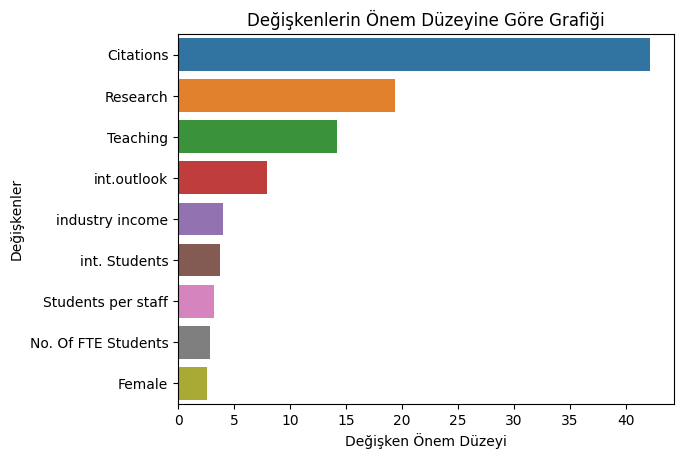

In [152]:
feature_imp=pd.Series(cat_final.feature_importances_,
                     index=x_train.columns).sort_values(ascending=False)
sns.barplot(x=feature_imp,y=feature_imp.index)
plt.xlabel("Değişken Önem Düzeyi")
plt.ylabel("Değişkenler")
plt.title("Değişkenlerin Önem Düzeyine Göre Grafiği")
plt.show()

# Performans Grafiği

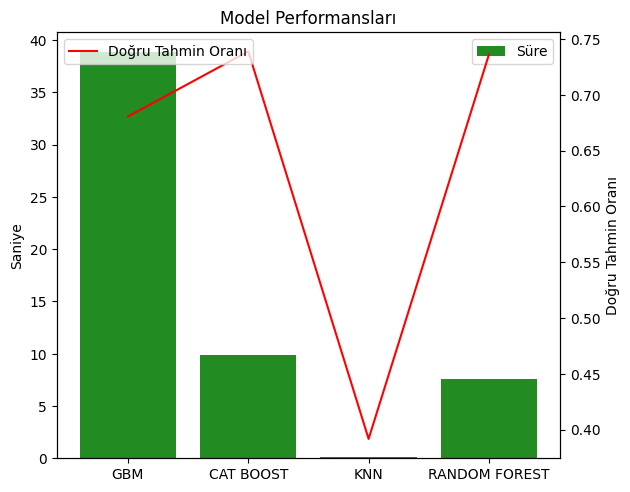

In [81]:
import matplotlib.pyplot as plt
import numpy as np

fig, ax1 = plt.subplots()
objects = ['GBM', 'CAT BOOST', 'KNN', 'RANDOM FOREST']
y_pos = np.arange(len(objects))
performance_time = [gbm_time, cat_time, lr_time, RF_time]
performance_acc = [gbm_acc, cat_acc, lr_acc, RF_acc]

ax1.set_ylabel('Saniye')
ax1.bar(y_pos, performance_time, color='forestgreen', label='Süre')
ax1.tick_params(axis='y')

ax2 = ax1.twinx()  # instantiate a second axes that shares the same x-axis
ax2.set_ylabel('Doğru Tahmin Oranı')  # we already handled the x-label with ax1
ax2.plot(y_pos, performance_acc, color='red', label='Doğru Tahmin Oranı')

plt.xticks(y_pos, objects)
fig.tight_layout()  # otherwise the right y-label is slightly clipped
plt.title('Model Performansları')

# Adding the legend
ax1.legend(loc='upper right')
ax2.legend(loc='upper left')
plt.show()


# Senaryo 1

In [123]:
deu_test=pd.read_excel("Test_DEU.xlsx")

In [124]:
deu_test

,No. Of FTE Students,Students per staff,int. Students,Female,Teaching,Research,Citations,industry income,int.outlook
0,56233,17.6,0.03,47,18.4,13.3,74.32,95.8,21.70
1,56233,17.6,0.03,47,18.4,13.3,53.41,95.8,21.70
2,56233,17.6,0.03,47,18.4,13.3,19.88,95.8,21.70
3,56233,17.6,0.03,47,18.4,13.3,86.09,95.8,21.70
4,56233,17.6,0.03,47,18.4,13.3,38.75,95.8,21.70
...,...,...,...,...,...,...,...,...,...
895,56233,17.6,0.03,47,18.4,13.3,20.90,95.8,31.75
896,56233,17.6,0.03,47,18.4,13.3,20.90,95.8,10.47
897,56233,17.6,0.03,47,18.4,13.3,20.90,95.8,15.61
898,56233,17.6,0.03,47,18.4,13.3,20.90,95.8,24.13


In [133]:
DEU_predict=cat_final.predict(deu_test)

In [138]:
deneme=pd.DataFrame(DEU_predict,columns=["Tahminlenen_Grup_Numarası"])

In [140]:
deu_test=pd.concat([deu_test,deneme],axis=1)

In [153]:
deu_test.to_excel("DEU_TAHMİN.xlsx")

# tüm değişkenler rastgele hesaplanmıştır.

In [142]:
deu_test2=pd.read_excel("deu_test_2.xlsx")

In [144]:
deu_sıra_tahmin=cat_final.predict(deu_test2)

In [145]:
deu_sıra_tahmin

array([[10],
       [15],
       [ 5],
       [13],
       [ 4],
       [10],
       [ 7],
       [ 1],
       [12],
       [11],
       [11],
       [ 5],
       [11],
       [10],
       [11],
       [ 8],
       [ 9],
       [14],
       [ 2],
       [10],
       [ 4],
       [ 2],
       [ 4],
       [ 2],
       [15],
       [13],
       [ 2],
       [13],
       [ 7],
       [13],
       [13],
       [11],
       [ 9],
       [15],
       [10],
       [12],
       [ 7],
       [ 1],
       [13],
       [11],
       [10],
       [ 4],
       [ 5],
       [ 6],
       [11],
       [11],
       [ 4],
       [10],
       [ 5],
       [13],
       [ 9],
       [13],
       [ 6],
       [14],
       [ 5],
       [ 1],
       [12],
       [ 9],
       [ 9],
       [10],
       [ 3],
       [10],
       [ 3],
       [ 2],
       [ 9],
       [ 3],
       [ 4],
       [ 2],
       [ 5],
       [10],
       [11],
       [ 7],
       [11],
       [13],
       [ 9],
       [13],
       [ 3],

In [146]:
deu_sıra_tahmin=pd.DataFrame(deu_sıra_tahmin,columns=["DEU SIRA TAHMİN"])

In [148]:
deu_test2=pd.concat([deu_test2,deu_sıra_tahmin],axis=1)

In [151]:
deu_test2.to_excel("DEU_TAHMİN_2.xlsx")

# Önemli 4 değişken için değerlendirme

In [162]:
dort_deigiskenli=pd.read_excel("En onemli 4 degisken.xlsx")

In [163]:
dort_deigiskenli_tahmin=cat_final.predict(dort_deigiskenli)

In [164]:
dort_deigiskenli_tahmin=pd.DataFrame(dort_deigiskenli_tahmin,columns=["DEU SIRA TAHMİN"])

In [166]:
dort_deigiskenli=pd.concat([dort_deigiskenli,dort_deigiskenli_tahmin],axis=1)

In [168]:
dort_deigiskenli.to_excel("dort_deigiskenli tahmin.xlsx")

# DTALE

In [118]:
import dtale

In [120]:
dtale.show(df)

C:\Users\arsla\AppData\Local\Programs\Python\Python311\Lib\site-packages\dtale\views.py:778: FutureWarning:

['Overall'] did not aggregate successfully. If any error is raised this will raise in a future version of pandas. Drop these columns/ops to avoid this warning.



2023-07-26 10:48:41,067 - ERROR    - Exception on /dtale/charts/_dash-update-component [POST]
Traceback (most recent call last):
  File "C:\Users\arsla\AppData\Local\Programs\Python\Python311\Lib\site-packages\flask\app.py", line 2528, in wsgi_app
    response = self.full_dispatch_request()
               ^^^^^^^^^^^^^^^^^^^^^^^^^^^^
  File "C:\Users\arsla\AppData\Local\Programs\Python\Python311\Lib\site-packages\flask\app.py", line 1825, in full_dispatch_request
    rv = self.handle_user_exception(e)
         ^^^^^^^^^^^^^^^^^^^^^^^^^^^^^
  File "C:\Users\arsla\AppData\Local\Programs\Python\Python311\Lib\site-packages\flask\app.py", line 1823, in full_dispatch_request
    rv = self.dispatch_request()
         ^^^^^^^^^^^^^^^^^^^^^^^
  File "C:\Users\arsla\AppData\Local\Programs\Python\Python311\Lib\site-packages\flask\app.py", line 1799, in dispatch_request
    return self.ensure_sync(self.view_functions[rule.endpoint])(**view_args)
           ^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^